In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join("DryBeanDataset", "dry_bean_trainval.csv"))

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,54180,951.753,388.728347,178.948203,2.172295,0.887741,55014,262.648279,0.580210,0.984840,0.751624,0.675660,0.007175,0.000922,0.456517,0.991689,HOROZ
1,42023,746.715,272.962686,196.334047,1.390297,0.694730,42365,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON
2,38600,716.517,254.129288,193.991641,1.310001,0.645976,38940,221.691331,0.715265,0.991269,0.944809,0.872356,0.006584,0.002352,0.761006,0.996919,SEKER
3,62298,992.583,327.685094,242.658033,1.350399,0.672032,63353,281.638558,0.801157,0.983347,0.794603,0.859479,0.005260,0.001771,0.738705,0.997546,BARBUNYA
4,74456,1085.466,447.665972,212.382328,2.107831,0.880298,75096,307.896612,0.788821,0.991478,0.794104,0.687782,0.006012,0.000830,0.473044,0.997097,HOROZ


In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000
mean,53147.967031,855.939458,320.359022,202.465845,1.582988,0.750643,53867.190376,253.273895,0.749900,0.987186,0.873411,0.799989,0.006558,0.001715,0.643813,0.995105
std,29493.212053,214.909630,85.898368,45.134794,0.247431,0.092340,29947.847946,59.352768,0.049227,0.004600,0.059606,0.061902,0.001128,0.000596,0.099307,0.004283
min,20464.000000,524.736000,183.965251,122.512653,1.036423,0.262774,20772.000000,161.417391,0.555315,0.919246,0.556766,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36405.000000,704.091000,253.495454,176.081974,1.431779,0.715677,36779.000000,215.295810,0.719124,0.985707,0.832178,0.762690,0.005902,0.001154,0.581696,0.993729
50%,44710.000000,795.871000,296.899313,192.534583,1.550759,0.764313,45261.000000,238.592833,0.759986,0.988301,0.883317,0.801400,0.006641,0.001697,0.642242,0.996393
75%,61333.000000,977.534000,376.512620,216.937144,1.706418,0.810295,62303.000000,279.448745,0.787073,0.990044,0.917142,0.834360,0.007265,0.002171,0.696156,0.997905
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.981611,0.010451,0.003665,0.963560,0.999733


In [5]:
df_train = df.sample(frac=0.875, random_state=200) #random state is a seed value
df_val = df.drop(df_train.index)
df_train.to_csv(os.path.join("DryBeanDataset", "dry_bean_train.csv"))
df_val.to_csv(os.path.join("DryBeanDataset", "dry_bean_val.csv"))

## EDA

In [6]:
y_classes = ["SEKER", "BARBUNYA", "BOMBAY", "CALI", "DERMASON", "HOROZ", "SIRA"]
df["Class"] = df["Class"].apply(lambda x: y_classes.index(x)) # map Class labels to int

### Correlation

<AxesSubplot:>

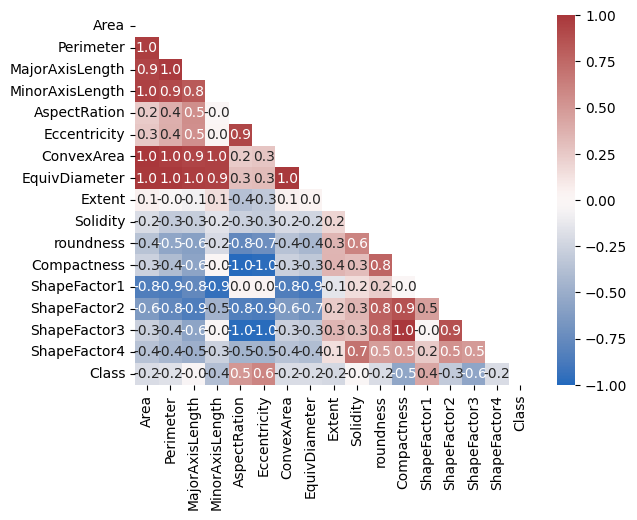

In [7]:
corr = df.corr("pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr, mask=mask, cmap="vlag", annot=True, fmt=".1f", vmin=-1, vmax=1)

<AxesSubplot:>

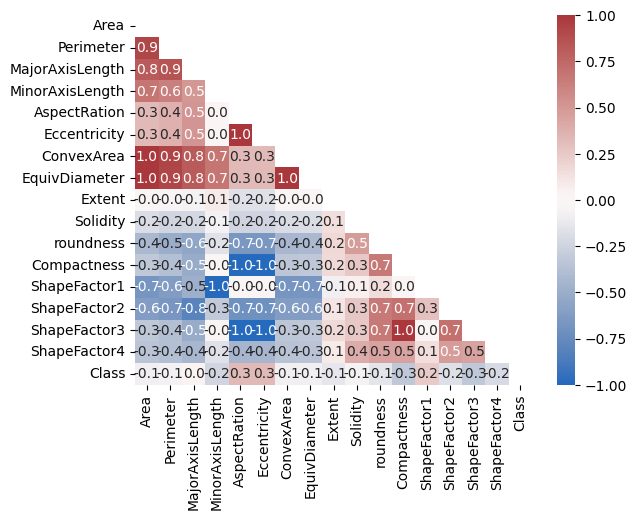

In [8]:
corr = df.corr("kendall")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr, mask=mask, cmap="vlag", annot=True, fmt=".1f", vmin=-1, vmax=1)

### Class Distribution

In [9]:
_d = df["Class"].value_counts().sort_index()
_d

0    1652
1    1065
2     424
3    1292
4    2794
5    1543
6    2119
Name: Class, dtype: int64

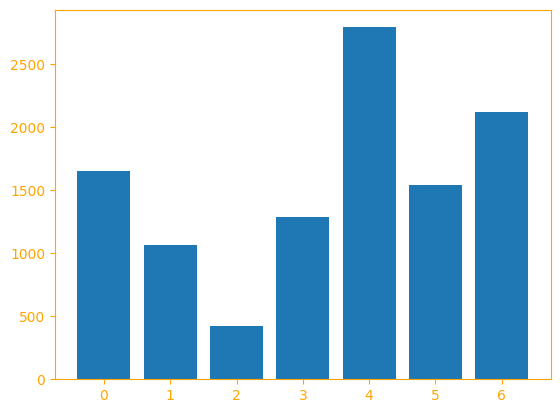

In [10]:
with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'orange', 'ytick.color':'orange'}):
    plt.bar(_d.index, _d.values)